It is an AI agent that thinks, then decides whether to call a tool (math function(add, mul , divide), search, etc.) or not , then returns the final answer.

In [121]:
print("helo Shubham")

helo Shubham


In [122]:
from langchain_groq import ChatGroq
llm = ChatGroq(model_name="qwen/qwen3-32b",
    temperature=0)
response = llm.invoke("what is the top 10 crypto")

In [123]:
response

AIMessage(content='<think>\nOkay, the user is asking for the top 10 cryptocurrencies. Let me start by recalling the major ones. Bitcoin is definitely number one. Then Ethereum is second. I think Binance Coin is third, but I should check the current market cap to be sure. Solana has been rising in popularity, maybe fourth? Then there\'s Cardano, maybe fifth. \n\nWait, I need to make sure the order is accurate. Let me think. After Bitcoin and Ethereum, the next big ones are usually Binance Coin (BNB), then maybe Solana (SOL), followed by Cardano (ADA), Dogecoin (DOGE), Polkadot (DOT), XRP, and maybe Avalanche (AVAX) or Chainlink (LINK). But I should verify the current market cap rankings because they can fluctuate.\n\nAlso, the user might be interested in both market cap and other factors like use cases. For example, Dogecoin is more of a meme coin but still in the top 10. XRP is involved in cross-border payments. I should mention each one\'s key features briefly. \n\nI need to be carefu

In [124]:
response.content

'<think>\nOkay, the user is asking for the top 10 cryptocurrencies. Let me start by recalling the major ones. Bitcoin is definitely number one. Then Ethereum is second. I think Binance Coin is third, but I should check the current market cap to be sure. Solana has been rising in popularity, maybe fourth? Then there\'s Cardano, maybe fifth. \n\nWait, I need to make sure the order is accurate. Let me think. After Bitcoin and Ethereum, the next big ones are usually Binance Coin (BNB), then maybe Solana (SOL), followed by Cardano (ADA), Dogecoin (DOGE), Polkadot (DOT), XRP, and maybe Avalanche (AVAX) or Chainlink (LINK). But I should verify the current market cap rankings because they can fluctuate.\n\nAlso, the user might be interested in both market cap and other factors like use cases. For example, Dogecoin is more of a meme coin but still in the top 10. XRP is involved in cross-border payments. I should mention each one\'s key features briefly. \n\nI need to be careful with the order. 

creating custom tools

In [125]:
from langchain.tools import tool

@tool
def multiply(a:int, b:int)->int:
    """
    Multiply two integers.

    Args:
        a (int): The first integer.
        b (int): The second integer.

    Returns:
        int: The product of a and b.
    """
    return a * b

@tool
def add(a:int, b:int)->int:
    """
    Adding two integers

    Args:
         a (int): The first integer.
         b (int): The second integer.

    Returns:
         int: The product of a and b.
    """
    return a+b

@tool
def divide(a:float , b:float)->float:
    """
    Divide two integers.

    Args: 
        a(int): The first integer
        b(int): The second integer(must be non zero)

    Returns:    
        float: The result of the divison

    """
    if b==0:
        raise ValueError("Denominator can not be zero")
    return a/b



Importing the inbuilt tools

In [126]:
from langchain_community.tools import DuckDuckGoSearchRun
search=DuckDuckGoSearchRun()


In [127]:
search.invoke("what is the latest update on stock market")


"Are you looking for the latest updates on the stock market ? CNN's updated stock data coverage provides the latest news and analysis on US markets ... Investors can get the latest updates on US markets , global markets , stock prices, cryptocurrencies, commodities and currencies. The best way to stay up-to-date on stock market news is through a platform that offers real-time alerts through text messages, email, or push ... US large-cap stocks were mixed as the technology sector dragged on a fresh sell-off in Tesla (TSLA), but the broader market had plenty of momentum ... In Europe, stocks are showing positive movement, with the STOXX Europe 600 Index climbing by 0.06% and the FTSE 100 Index rising by 0.13% from the ..."

In [128]:
tools=[multiply, add, divide, search]

In [129]:
llm_with_tools=llm.bind_tools(tools)


In [130]:
response=llm_with_tools.invoke("hello, Shubham this side")


In [131]:
response

AIMessage(content="Hello! It seems like you're trying to reach Shubham, but I'm an AI here to help with any questions you might have. How can I assist you today?", additional_kwargs={'reasoning_content': 'Okay, the user said "hello, Shubham this side". Let me think about how to respond.\n\nFirst, I need to acknowledge their greeting. Since they mentioned "Shubham this side", maybe they\'re trying to get in touch with someone named Shubham. But I\'m an AI, so I should clarify that. \n\nI should respond in a friendly and helpful manner. Let them know I\'m here to assist with any questions they have. Maybe ask how I can help them today. Keep it open-ended so they feel comfortable to ask anything specific.\n\nAlso, check if there\'s any need to use a tool here. They didn\'t ask for anything that requires a function call yet. Just a general greeting. So no tool needed. Just a polite response.\n'}, response_metadata={'token_usage': {'completion_tokens': 198, 'prompt_tokens': 500, 'total_toke

In [132]:
response.content

"Hello! It seems like you're trying to reach Shubham, but I'm an AI here to help with any questions you might have. How can I assist you today?"

In [133]:
response.tool_calls


[]

In [134]:
response=llm_with_tools.invoke("what is 1+2?")


In [135]:
response.content

''

In [136]:
response.tool_calls

[{'name': 'add',
  'args': {'a': 1, 'b': 2},
  'id': '0521ybapf',
  'type': 'tool_call'}]

In [137]:
response=llm_with_tools.invoke("what is a current price of nifty?")


In [138]:
response

AIMessage(content='', additional_kwargs={'reasoning_content': 'Okay, the user is asking for the current price of Nifty. Nifty usually refers to the Nifty 50 index, which is a stock market index in India. To get the current price, I need to check the latest data from a reliable source. Since the user is asking for real-time information, I should use the DuckDuckGo Search function to look up the current value. The other functions like add, multiply, or divide aren\'t relevant here. So I\'ll use the duckduckgo_search function with the query "current price of Nifty 50" to fetch the latest data.\n', 'tool_calls': [{'id': 'g3y16ptwq', 'function': {'arguments': '{"query":"current price of Nifty 50"}', 'name': 'duckduckgo_search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 158, 'prompt_tokens': 502, 'total_tokens': 660, 'completion_time': 0.295035222, 'prompt_time': 0.021255204, 'queue_time': 0.05279685, 'total_time': 0.316290426}, 'model_name': 'qwen/qwen3

In [139]:
response.content

''

In [140]:
response.tool_calls

[{'name': 'duckduckgo_search',
  'args': {'query': 'current price of Nifty 50'},
  'id': 'g3y16ptwq',
  'type': 'tool_call'}]

In [141]:
SYSTEM_PROMPT="You are a helpful assistant tasked with using search and performing arithmetic on a set of inputs."


In [142]:
user_query=["tell me what is 1+2"]

In [143]:
[SYSTEM_PROMPT]+user_query


['You are a helpful assistant tasked with using search and performing arithmetic on a set of inputs.',
 'tell me what is 1+2']

In [144]:
from langgraph.graph import MessagesState

def fun_1 (state:MessagesState):
    user_question = state["messages"]
    input_question = [SYSTEM_PROMPT]+user_question
    response = llm_with_tools.invoke(input_question)
    return {
        "messages":[response]
    }

 

In [145]:
from langchain_core.messages import HumanMessage, SystemMessage
from langgraph.graph import MessagesState,StateGraph, END, START

In [146]:
builder=StateGraph(MessagesState)


In [147]:
builder.add_node("query_classifier",fun_1)


In [148]:
from langgraph.prebuilt import ToolNode
builder.add_node("tools",ToolNode(tools))

In [149]:
builder.add_edge(START,"query_classifier")

In [150]:
from langgraph.prebuilt import tools_condition
builder.add_conditional_edges(
    "query_classifier",
    tools_condition,
)

In [151]:
builder.add_edge("tools","query_classifier")


In [152]:
react_graph=builder.compile()


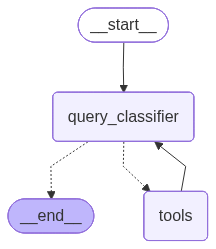

In [153]:
from IPython.display import Image, display
display(Image(react_graph.get_graph().draw_mermaid_png()))

In [154]:
message = [HumanMessage(content="How much is the net worth of Mukesh Ambani, and divide it by 2?")]


In [155]:
react_graph.invoke({"messages":message})


{'messages': [HumanMessage(content='How much is the net worth of Mukesh Ambani, and divide it by 2?', additional_kwargs={}, response_metadata={}, id='cda7dfc9-0798-4857-bde5-029df910b041'),
  AIMessage(content='', additional_kwargs={'reasoning_content': 'Okay, the user is asking for Mukesh Ambani\'s net worth and then wants it divided by 2. First, I need to find his current net worth. Since net worth can fluctuate, especially for someone like Ambani, I should use the DuckDuckGo search function to get the latest information. \n\nI\'ll start by calling the duckduckgo_search function with the query "Mukesh Ambani net worth 2024". That should give me recent data. Once I get the net worth, I need to divide it by 2. The divide function requires two numbers, so after retrieving the net worth as a number, I\'ll use the divide function with a=net_worth and b=2.\n\nWait, the user might not know that Ambani\'s net worth is in billions. Also, I need to ensure that the search results provide a spec

In [156]:
message = [HumanMessage(content="What is the distance between jewar and aligarh and multiply it by 10?")]


In [157]:
response= react_graph.invoke({"messages":message})


In [158]:
response


{'messages': [HumanMessage(content='What is the distance between jewar and aligarh and multiply it by 10?', additional_kwargs={}, response_metadata={}, id='dccb8f29-df54-42d3-ad23-5c2643a79656'),
  AIMessage(content='', additional_kwargs={'reasoning_content': 'Okay, I need to find the distance between Jewar and Aligarh first. I don\'t know the exact distance off the top of my head, so I should use the DuckDuckGo search function to look it up. Let me check if there\'s a function available for that. Yes, there\'s the duckduckgo_search function. I\'ll input the query "distance between jewar and aligarh" to get the result.\n\nOnce I get the distance, I\'ll need to multiply it by 10. The multiply function is available, so after retrieving the distance, I can call multiply with the distance as \'a\' and 10 as \'b\'. But wait, I need to make sure the distance is a number. If the search result gives it in kilometers or miles, I can convert it to an integer or float. If there\'s a unit mentione

In [159]:
response["messages"][-1].content


'The distance between Jewar and Aligarh is 63 km by road. Multiplying this by 10 gives:\n\n$$\n63 \\times 10 = 630\n$$\n\n**Answer:** \\boxed{630}'

In [160]:
for m in response["messages"]:
    m.pretty_print()

================================ Human Message =================================

What is the distance between jewar and aligarh and multiply it by 10?
================================== Ai Message ==================================
Tool Calls:
  duckduckgo_search (a9kg5p9j0)
 Call ID: a9kg5p9j0
  Args:
    query: distance between jewar and aligarh
================================= Tool Message =================================
Name: duckduckgo_search

February 15, 2025 - Jewar is situated on Yamuna Expressway which connects Greater Noida with Agra via Dankaur, Bajna and Raya. It is also connected by NH-334D which connects Aligarh and Palwal via Khair, Tappal and Hamidpur. 4 days ago - Reaching the upcoming Noida International Airport (NIA) in Jewar presents a challenge due to its distance from major locations like Delhi and Noida. Current public transport options are limited, but plans are in place to introduce city bus and electric taxi services. May 10, 2025 - The distance between A